## Pandas 数据分析处理（下）
### 目录
- 分组/Groupby
- 聚合/agg
- 数据拼接/concat
- 数据合并/merge
- 小项目/project

In [3]:
import pandas as pd
import numpy as np

In [56]:
salaries = pd.DataFrame({
    'Name':['BOSS','HanMeimei','Han','BOSS','BOSS','HanMeimei','BOSS','HanMeimei'],
    'Year':[2017,2018,2016,2017,2018,2019,2015,2017],
    'Salary':[4000,5000,4000,3000,38000,42000,6000,39000],
    'Bonus':[12000,3000,35000,1200,16000,18000,7000,21000]
})
salaries

,Name,Year,Salary,Bonus
0,BOSS,2017,4000,12000
1,HanMeimei,2018,5000,3000
2,Han,2016,4000,35000
3,BOSS,2017,3000,1200
4,BOSS,2018,38000,16000
5,HanMeimei,2019,42000,18000
6,BOSS,2015,6000,7000
7,HanMeimei,2017,39000,21000


group by 分组，通过字段的不同（离散型）有固定的候选的取值，根据字段的不同进行分组划分。

In [57]:
group_by_name = salaries.groupby('Name')
group_by_name

In [58]:
type(group_by_name)

pandas.core.groupby.groupby.DataFrameGroupBy

In [59]:
#取不同的分组  元组 2 个元素
for item in group_by_name:
    print(item)
    print('\n')

('BOSS',    Name  Year  Salary  Bonus
0  BOSS  2017    4000  12000
3  BOSS  2017    3000   1200
4  BOSS  2018   38000  16000
6  BOSS  2015    6000   7000)


('Han',   Name  Year  Salary  Bonus
2  Han  2016    4000  35000)


('HanMeimei',         Name  Year  Salary  Bonus
1  HanMeimei  2018    5000   3000
5  HanMeimei  2019   42000  18000
7  HanMeimei  2017   39000  21000)




groupby 分组之后对数据做一些聚合操作：

In [60]:
group_by_name.sum()

,Year,Salary,Bonus
Name,,,
BOSS,8067,51000,36200
Han,2016,4000,35000
HanMeimei,6054,86000,42000


In [61]:
group_by_name.mean() #求均值

,Year,Salary,Bonus
Name,,,
BOSS,2016.75,12750.000000,9050.0
Han,2016.00,4000.000000,35000.0
HanMeimei,2018.00,28666.666667,14000.0


In [62]:
group_by_name.median() #求中位数  中位数比均值更稳定

,Year,Salary,Bonus
Name,,,
BOSS,2017,5000,9500
Han,2016,4000,35000
HanMeimei,2018,39000,18000


In [12]:
salaries.groupby('Name')[['Bonus','Salary']].mean()

,Bonus,Salary
Name,,
BOSS,9050.0,12750.000000
Han,35000.0,4000.000000
HanMeimei,14000.0,28666.666667


#按照几列去分组
salaries.groupby(['Name','Year']).sum()

In [14]:
salaries.groupby(['Name','Year']).sum()

Salary  Bonus
Name      Year               
BOSS      2015    6000   7000
          2017    7000  13200
          2018   38000  16000
Han       2016    4000  35000
HanMeimei 2017   39000  21000
          2018    5000   3000
          2019   42000  18000

In [15]:
temp = salaries.groupby(['Name','Year']).sum()
temp.index

MultiIndex(levels=[['BOSS', 'Han', 'HanMeimei'], [2015, 2016, 2017, 2018, 2019]],
           labels=[[0, 0, 0, 1, 2, 2, 2], [0, 2, 3, 1, 2, 3, 4]],
           names=['Name', 'Year'])

In [20]:
temp.reset_index() #已返回值的形式返回

,Name,Year,Salary,Bonus
0,BOSS,2015,6000,7000
1,BOSS,2017,7000,13200
2,BOSS,2018,38000,16000
3,Han,2016,4000,35000
4,HanMeimei,2017,39000,21000
5,HanMeimei,2018,5000,3000
6,HanMeimei,2019,42000,18000


In [16]:
#一个处理是否就地变化
temp

Salary  Bonus
Name      Year               
BOSS      2015    6000   7000
          2017    7000  13200
          2018   38000  16000
Han       2016    4000  35000
HanMeimei 2017   39000  21000
          2018    5000   3000
          2019   42000  18000

In [18]:
temp.reset_index(inplace=True)
temp

,index,Name,Year,Salary,Bonus
0,0,BOSS,2015,6000,7000
1,1,BOSS,2017,7000,13200
2,2,BOSS,2018,38000,16000
3,3,Han,2016,4000,35000
4,4,HanMeimei,2017,39000,21000
5,5,HanMeimei,2018,5000,3000
6,6,HanMeimei,2019,42000,18000


In [22]:
salaries.groupby(['Name','Year'],sort=False).sum()

,,Salary,Bonus
Name,Year,,
BOSS,2017,7000,13200
HanMeimei,2018,5000,3000
Han,2016,4000,35000
BOSS,2018,38000,16000
HanMeimei,2019,42000,18000
BOSS,2015,6000,7000
HanMeimei,2017,39000,21000


### 统计运算
- 求和
- 求均值
- 求中位数
- 求标准差
- 求频次

In [29]:
salaries.groupby(['Name'],sort=False).sum()

,Year,Salary,Bonus
Name,,,
BOSS,8067,51000,36200
HanMeimei,6054,86000,42000
Han,2016,4000,35000


In [28]:
salaries.groupby(['Name'],sort=False).mean()

,Year,Salary,Bonus
Name,,,
BOSS,2016.75,12750.000000,9050.0
HanMeimei,2018.00,28666.666667,14000.0
Han,2016.00,4000.000000,35000.0


In [27]:
salaries.groupby(['Name'],sort=False).size() #频次 重要

Name
BOSS         4
HanMeimei    3
Han          1
dtype: int64

#### 三个重要的函数
- 

In [36]:
salaries.shape

(8, 4)

In [34]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
Name      8 non-null object
Year      8 non-null int64
Salary    8 non-null int64
Bonus     8 non-null int64
dtypes: int64(3), object(1)
memory usage: 336.0+ bytes


In [35]:
#输出分布信息函数
salaries.describe()

,Year,Salary,Bonus
count,8.000000,8.000000,8.00000
mean,2017.125000,17625.000000,14150.00000
std,1.246423,18306.419639,11004.28488
min,2015.000000,3000.000000,1200.00000
25%,2016.750000,4000.000000,6000.00000
50%,2017.000000,5500.000000,14000.00000
75%,2018.000000,38250.000000,18750.00000
max,2019.000000,42000.000000,35000.00000


In [39]:
#分组 + 分布信息输出
salaries.groupby('Name')[['Bonus','Salary']].agg(['sum','median','std','mean'])

Bonus                            Salary                       \
             sum median          std   mean    sum median           std   
Name                                                                      
BOSS       36200   9500  6398.697784   9050  51000   5000  16879.474715   
Han        35000  35000          NaN  35000   4000   4000           NaN   
HanMeimei  42000  18000  9643.650761  14000  86000  39000  20550.750189   

                         
                   mean  
Name                     
BOSS       12750.000000  
Han         4000.000000  
HanMeimei  28666.666667

统计运算（用聚合函数）
- 求和
- 求均值
- 求中位数
- 求标准差
- 求频次

In [40]:
salaries.groupby('Name')[['Bonus','Salary']].agg([np.median,np.sum,np.std,np.mean])

Bonus                            Salary                       \
          median    sum          std   mean median    sum           std   
Name                                                                      
BOSS        9500  36200  6398.697784   9050   5000  51000  16879.474715   
Han        35000  35000          NaN  35000   4000   4000           NaN   
HanMeimei  18000  42000  9643.650761  14000  39000  86000  20550.750189   

                         
                   mean  
Name                     
BOSS       12750.000000  
Han         4000.000000  
HanMeimei  28666.666667

In [21]:
# 连续值可以统计分布
# 离散值
salaries['Year'].unique() #指有多少种不同的取值

array([2017, 2018, 2016, 2019, 2015])

In [44]:
salaries['Name'].value_counts() #出现的次数

BOSS         4
HanMeimei    3
Han          1
Name: Name, dtype: int64

In [24]:
nvda=pd.read_csv("NVDA.csv",index_col=0,parse_dates=['Date'])
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [25]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4654 entries, 1999-01-22 to 2017-07-20
Data columns (total 6 columns):
Open         4654 non-null float64
High         4654 non-null float64
Low          4654 non-null float64
Close        4654 non-null float64
Adj Close    4654 non-null float64
Volume       4654 non-null int64
dtypes: float64(5), int64(1)
memory usage: 254.5 KB


In [29]:
#新增加一列，取出
# nvda.index 就是 Data
nvda.loc[:,'year'] = nvda.index.year
nvda.head()

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200,1999
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000,1999
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000,1999
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200,1999
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000,1999


In [30]:
nvda.loc[:,'dow'] = nvda.index.dayofweek
nvda.head()

,Open,High,Low,Close,Adj Close,Volume,year,dow
Date,,,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200,1999,4
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000,1999,0
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000,1999,1
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200,1999,2
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000,1999,3


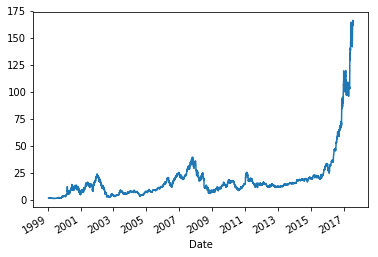

In [31]:
%matplotlib inline
nvda['Open'].plot()

In [69]:
nvda.groupby(['year','dow']).agg([np.mean,np.std])

Open                   High                    Low             \
                mean        std        mean        std        mean        std   
year dow                                                                        
1999 0      1.977430   0.620642    2.021614   0.641740    1.898698   0.581392   
     1      1.946482   0.579052    2.000213   0.603046    1.871280   0.564460   
     2      1.949405   0.585537    2.010417   0.613806    1.883929   0.569160   
     3      1.940972   0.582534    2.001953   0.619755    1.878255   0.578437   
     4      1.941406   0.602176    2.003364   0.620325    1.886827   0.589190   
2000 0      8.938552   3.025593    9.423260   3.201185    8.520224   2.915270   
     1      8.875842   3.106100    9.246528   3.176525    8.364175   2.971729   
     2      8.748347   2.942329    9.106070   3.064057    8.267253   2.864255   
     3      8.625102   3.027572    9.066891   3.114900    8.246017   2.950425   
     4      8.730571   3.008297    9.288756   3.131465    8.419296   2.929829   
2001 0     13.357639   3.908381   13.798316   3.974951   12.921816   3.915386   
     1     12.754242   3.691376   13.290804   3.755658   12.331131   3.682727   
     2     12.950575   4.022030   13.514200   3.957012   12.533042   4.007816   
     3     13.095535   3.867588   13.663723   3.757872   12.729858   3.817101   
     4     13.308933   3.828064   13.744612   3.837716   12.896546   3.850447   
2002 0      9.224305   6.341320    9.552292   6.504674    8.974653   6.202623   
     1      9.666154   6.524762    9.936603   6.639411    9.317115   6.363246   
     2      9.982680   6.737338   10.239216   6.817683    9.599346   6.537529   
     3      9.991133   6.752840   10.226200   6.854137    9.614200   6.553940   
     4      9.566405   6.663848    9.803137   6.734708    9.200719   6.437243   
2003 0      5.966458   1.490328    6.106597   1.490452    5.822361   1.416920   
     1      5.889679   1.435278    6.064615   1.493769    5.782628   1.419297   
     2      5.936603   1.472113    6.066603   1.502746    5.815449   1.440056   
     3      5.819133   1.465275    5.947067   1.515483    5.679467   1.434336   
     4      5.902000   1.502411    6.029133   1.508856    5.724467   1.457836   
2004 0      6.434326   1.496642    6.556312   1.509847    6.313121   1.458916   
     1      6.499487   1.466409    6.639423   1.497743    6.365833   1.445844   
     2      6.510064   1.479163    6.625769   1.484931    6.392115   1.467603   
     3      6.515817   1.479738    6.637582   1.488514    6.373399   1.436431   
     4      6.458733   1.474163    6.579333   1.488165    6.318467   1.471972   
...              ...        ...         ...        ...         ...        ...   
2012 0     13.463830   1.214078   13.622128   1.174821   13.241277   1.177089   
     1     13.567000   1.188285   13.770600   1.157500   13.375200   1.159453   
     2     13.499804   1.168210   13.722157   1.216012   13.312353   1.170392   
     3     13.554118   1.109187   13.775490   1.195119   13.360196   1.131276   
     4     13.542157   1.247592   13.690196   1.252143   13.304902   1.229344   
2013 0     14.259167   1.217720   14.391667   1.238021   14.086458   1.257061   
     1     14.201346   1.268171   14.332885   1.272203   14.063462   1.269111   
     2     14.093333   1.255608   14.290980   1.259875   13.964902   1.248821   
     3     14.112600   1.295337   14.274600   1.279085   13.983200   1.291360   
     4     14.204706   1.260316   14.361373   1.262358   14.079804   1.245370   
2014 0     18.563542   1.317153   18.761250   1.317360   18.370833   1.314611   
     1     18.530192   1.310123   18.759808   1.279218   18.371346   1.277825   
     2     18.610577   1.275301   18.813462   1.265187   18.430192   1.245452   
     3     18.461800   1.242907   18.660600   1.257835   18.252800   1.239593   
     4     18.547800   1.366518   18.729600   1.345126   18.312600   1.346759   
2015 0     23.864792   4.259261   24.138958   4

### 变换函数
对一列做处理/变换

In [36]:
salaries

,Name,Year,Salary,Bonus
0,BOSS,2017,4000,12000
1,HanMeimei,2018,5000,3000
2,Han,2016,4000,35000
3,BOSS,2017,3000,1200
4,BOSS,2018,38000,16000
5,HanMeimei,2019,42000,18000
6,BOSS,2015,6000,7000
7,HanMeimei,2017,39000,21000


In [68]:
salaries.loc[:,'my_salary'] = salaries['Salary']*2-1000
salaries

,Name,Year,Salary,Bonus,full_name,salaries,my_salary
0,BOSS,2017,4000,12000,BOSS,7000,7000
1,HanMeimei,2018,5000,3000,HanMeimei,9000,9000
2,Han,2016,4000,35000,HanXiaoYang,7000,7000
3,BOSS,2017,3000,1200,BOSS,5000,5000
4,BOSS,2018,38000,16000,BOSS,75000,75000
5,HanMeimei,2019,42000,18000,HanMeimei,83000,83000
6,BOSS,2015,6000,7000,BOSS,11000,11000
7,HanMeimei,2017,39000,21000,HanMeimei,77000,77000


In [67]:
#简单操作用 apply 实现一下
def my_func(x):
    return x*2-1000

salaries.loc[:,'salaries'] = salaries['Salary'].apply(my_func)
salaries

,Name,Year,Salary,Bonus,full_name,salaries
0,BOSS,2017,4000,12000,BOSS,7000
1,HanMeimei,2018,5000,3000,HanMeimei,9000
2,Han,2016,4000,35000,HanXiaoYang,7000
3,BOSS,2017,3000,1200,BOSS,5000
4,BOSS,2018,38000,16000,BOSS,75000
5,HanMeimei,2019,42000,18000,HanMeimei,83000
6,BOSS,2015,6000,7000,BOSS,11000
7,HanMeimei,2017,39000,21000,HanMeimei,77000


In [ ]:
# loc iloc
# loc 逗号前对行进行选择，逗号后对列进行选择

In [63]:
salaries.loc[salaries['Salary']>4000 & (salaries['Bonus']>=7000),['Name','Salary','Bonus']]

,Name,Salary,Bonus
0,BOSS,4000,12000
1,HanMeimei,5000,3000
2,Han,4000,35000
3,BOSS,3000,1200
4,BOSS,38000,16000
5,HanMeimei,42000,18000
6,BOSS,6000,7000
7,HanMeimei,39000,21000


In [64]:
def trans(x):
    return x if x != 'Han' else 'HanXiaoYang'

salaries.loc[:,'full_name'] = salaries['Name'].apply(trans)
salaries

,Name,Year,Salary,Bonus,full_name
0,BOSS,2017,4000,12000,BOSS
1,HanMeimei,2018,5000,3000,HanMeimei
2,Han,2016,4000,35000,HanXiaoYang
3,BOSS,2017,3000,1200,BOSS
4,BOSS,2018,38000,16000,BOSS
5,HanMeimei,2019,42000,18000,HanMeimei
6,BOSS,2015,6000,7000,BOSS
7,HanMeimei,2017,39000,21000,HanMeimei


In [45]:
# 如果对某一列变化到另一列，用简单操作，直接用广播特性
# 如果是复杂变换，用 apply

In [65]:
salaries['Salary']*3

0     12000
1     15000
2     12000
3      9000
4    114000
5    126000
6     18000
7    117000
Name: Salary, dtype: int64

### lambda 函数

In [72]:
salaries.loc[:,'full_name2'] = salaries['Name'].apply(lambda x: x if x != 'Han' else 'HanXiaoYang')
salaries

,Name,Year,Salary,Bonus,full_name,salaries,my_salary,full_name2
0,BOSS,2017,4000,12000,BOSS,7000,7000,BOSS
1,HanMeimei,2018,5000,3000,HanMeimei,9000,9000,HanMeimei
2,Han,2016,4000,35000,HanXiaoYang,7000,7000,HanXiaoYang
3,BOSS,2017,3000,1200,BOSS,5000,5000,BOSS
4,BOSS,2018,38000,16000,BOSS,75000,75000,BOSS
5,HanMeimei,2019,42000,18000,HanMeimei,83000,83000,HanMeimei
6,BOSS,2015,6000,7000,BOSS,11000,11000,BOSS
7,HanMeimei,2017,39000,21000,HanMeimei,77000,77000,HanMeimei


#### 对几列做变换 

In [75]:
# 几列的变化很简单，用广播特性
salaries.loc[:,'income'] = salaries['Salary']*12 + salaries['Bonus']
salaries

,Name,Year,Salary,Bonus,full_name,salaries,my_salary,full_name2,income
0,BOSS,2017,4000,12000,BOSS,7000,7000,BOSS,60000
1,HanMeimei,2018,5000,3000,HanMeimei,9000,9000,HanMeimei,63000
2,Han,2016,4000,35000,HanXiaoYang,7000,7000,HanXiaoYang,83000
3,BOSS,2017,3000,1200,BOSS,5000,5000,BOSS,37200
4,BOSS,2018,38000,16000,BOSS,75000,75000,BOSS,472000
5,HanMeimei,2019,42000,18000,HanMeimei,83000,83000,HanMeimei,522000
6,BOSS,2015,6000,7000,BOSS,11000,11000,BOSS,79000
7,HanMeimei,2017,39000,21000,HanMeimei,77000,77000,HanMeimei,489000


In [80]:
# 如果是 boss，返回 工资+奖金，如果是员工，返回工资
def my_income(name,salary,bonus):
    if name == 'BOSS':
        return salary*12+bonus
    else:
        return salary*12
    
salaries.loc[:,'my_income'] = list(map(lambda x,y,z: my_income(x,y,z),
                                 salaries['Name'],
                                 salaries['Salary'],
                                 salaries['Bonus']))
salaries

,Name,Year,Salary,Bonus,full_name,salaries,my_salary,full_name2,income,my_income
0,BOSS,2017,4000,12000,BOSS,7000,7000,BOSS,60000,60000
1,HanMeimei,2018,5000,3000,HanMeimei,9000,9000,HanMeimei,63000,60000
2,Han,2016,4000,35000,HanXiaoYang,7000,7000,HanXiaoYang,83000,48000
3,BOSS,2017,3000,1200,BOSS,5000,5000,BOSS,37200,37200
4,BOSS,2018,38000,16000,BOSS,75000,75000,BOSS,472000,472000
5,HanMeimei,2019,42000,18000,HanMeimei,83000,83000,HanMeimei,522000,504000
6,BOSS,2015,6000,7000,BOSS,11000,11000,BOSS,79000,79000
7,HanMeimei,2017,39000,21000,HanMeimei,77000,77000,HanMeimei,489000,468000


## 总结
- groupby 取分组内容
- groupby 分组做统计计算， agg(['mean','median','std']) add([np.mean,np.median,np.std])
- groupby 之后可以 describe 看统计情况，离散型 unique() value_counts()
- apply 对列做变换
- 附加：对多列做变换， map(lambda x,y,z : func(x,y,z),  df['Name'],df['Salary'],df['Bonus'])

## 数据的拼接和合并
可能会有多个 DataFrame，要对他们进行合并处理
- concat
- merge
- join

In [82]:
df1 = pd.DataFrame({
    'apta':[550000,500000],
    'cars':[200000,300000]
}, index = ['Hangzhou','Guangzhou'])
df1

,apta,cars
Hangzhou,550000,200000
Guangzhou,500000,300000


In [83]:
df2 = pd.DataFrame({
    'apta':[350000,600000],
    'cars':[220000,160000]
}, index = ['Hangzhou','Guangzhou'])
df2

,apta,cars
Hangzhou,350000,220000
Guangzhou,600000,160000


In [89]:
df3 = pd.DataFrame({
    'apta':[300000,400000],
    'cars':[120000,260000]
}, index = ['Beijing','Shanghai'])
df3

,apta,cars
Beijing,300000,120000
Shanghai,400000,260000


In [91]:
# concat 拼接 默认按照行拼接，列对齐
result = pd.concat([df1,df2,df3],axis=0)
result

,apta,cars
Hangzhou,550000,200000
Guangzhou,500000,300000
Hangzhou,350000,220000
Guangzhou,600000,160000
Beijing,300000,120000
Shanghai,400000,260000


In [94]:
# 默认按照 index 对齐
result1 = pd.concat([df1,df2,df3],axis=1)
result1

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,apta,cars,apta,cars,apta,cars
Beijing,NaN,NaN,NaN,NaN,300000.0,120000.0
Guangzhou,500000.0,300000.0,600000.0,160000.0,NaN,NaN
Hangzhou,550000.0,200000.0,350000.0,220000.0,NaN,NaN
Shanghai,NaN,NaN,NaN,NaN,400000.0,260000.0


### 合并/Merge

In [96]:
def my_trans_apt(x):
    if x<=450000:
        return 450000
    else:
        return 600000
    
result.loc[:,'new_apta'] = result['apta'].apply(my_trans_apt)
result

,apta,cars,new_apta
Hangzhou,550000,200000,600000
Guangzhou,500000,300000,600000
Hangzhou,350000,220000,450000
Guangzhou,600000,160000,600000
Beijing,300000,120000,450000
Shanghai,400000,260000,450000


In [103]:
new_df = pd.DataFrame({
    'new_apta':[60000,45000],
    'bonus':[100000,120000]
},index = ['SH','LS'])
new_df

,new_apta,bonus
SH,60000,100000
LS,45000,120000


In [105]:
# 外联接
pd.merge(result, new_df, on=['new_apta'], how='outer')

,apta,cars,new_apta,bonus
0,550000.0,200000.0,600000,NaN
1,500000.0,300000.0,600000,NaN
2,600000.0,160000.0,600000,NaN
3,350000.0,220000.0,450000,NaN
4,300000.0,120000.0,450000,NaN
5,400000.0,260000.0,450000,NaN
6,NaN,NaN,60000,100000.0
7,NaN,NaN,45000,120000.0


In [106]:
# 左连接
pd.merge(result, new_df, on=['new_apta'], how='left')

,apta,cars,new_apta,bonus
0,550000,200000,600000,NaN
1,500000,300000,600000,NaN
2,350000,220000,450000,NaN
3,600000,160000,600000,NaN
4,300000,120000,450000,NaN
5,400000,260000,450000,NaN


#### join
join 基于 index 去做数据合并

In [110]:
df5 = pd.DataFrame({
    'apta':[300000,400000],
    'cars':[120000,260000]
})
df5

,apta,cars
0,300000,120000
1,400000,260000


In [112]:
df6 = pd.DataFrame({
    'apt':[400000,400000],
    'car':[130000,160000]
})
df6

,apt,car
0,400000,130000
1,400000,160000


In [113]:
df5.join(df6)

,apta,cars,apt,car
0,300000,120000,400000,130000
1,400000,260000,400000,160000


### 总结
- concat：拼接，按照某个维度做拼接
- merge：表合并，基于某个列去做关联
- join：基于index去做数据合并

### 自行车租赁分析

In [117]:
bikes = pd.read_csv('bikes.csv',sep=';',
                    encoding='latin1',
                    index_col='Date',
                    parse_dates=['Date'])
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2012-03-01,135,NaN,2,104,248,89,3,58,NaN
2012-04-01,144,NaN,1,116,318,111,8,61,NaN
2012-05-01,197,NaN,2,124,330,97,13,95,NaN


In [119]:
bikes.shape

(310, 9)

In [120]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-05-11
Data columns (total 9 columns):
Berri 1                                310 non-null int64
Brébeuf (données non disponibles)      0 non-null float64
Côte-Sainte-Catherine                  310 non-null int64
Maisonneuve 1                          310 non-null int64
Maisonneuve 2                          310 non-null int64
du Parc                                310 non-null int64
Pierre-Dupuy                           310 non-null int64
Rachel1                                310 non-null int64
St-Urbain (données non disponibles)    0 non-null float64
dtypes: float64(2), int64(7)
memory usage: 24.2 KB


In [121]:
bikes.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


In [122]:
# inplace = True 就地变化
bikes.dropna(axis=1,how='all',inplace=True)
bikes.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-02-01,83,1,68,153,53,6,43
2012-03-01,135,2,104,248,89,3,58
2012-04-01,144,1,116,318,111,8,61
2012-05-01,197,2,124,330,97,13,95


In [123]:
bikes.loc[:,'weekday'] = bikes.index.weekday
bikes.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,weekday
Date,,,,,,,,
2012-01-01,35,0,38,51,26,10,16,6
2012-02-01,83,1,68,153,53,6,43,2
2012-03-01,135,2,104,248,89,3,58,3
2012-04-01,144,1,116,318,111,8,61,6
2012-05-01,197,2,124,330,97,13,95,1


In [127]:
weekday_counts = bikes.groupby('weekday').agg(np.sum)
weekday_counts

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
weekday,,,,,,,
0,132446,57940,90828,163042,89338,41524,126215
1,119895,52113,80865,145389,79585,35967,114622
2,146785,64189,99674,177105,96340,45103,130796
3,147630,61855,102801,177285,93386,46600,135268
4,150183,61432,102317,181651,95731,47272,143115
5,118232,42380,73129,124957,61813,55632,123403
6,110194,42430,65217,118752,61332,54737,117361


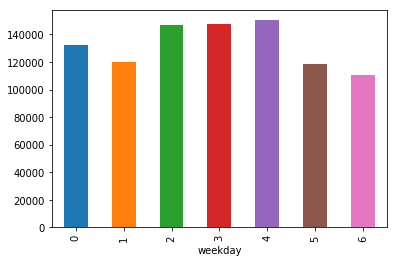

In [128]:
%matplotlib inline
weekday_counts['Berri 1'].plot(kind='bar')

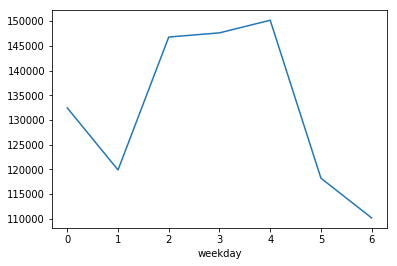

In [129]:
weekday_counts['Berri 1'].plot()

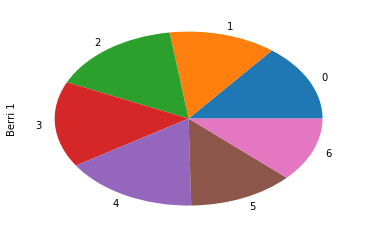

In [130]:
weekday_counts['Berri 1'].plot(kind='pie')